## Brief Introduction of the dataset

This dataset provides a real-time analysis of bike availability and station amenities for the Vélib' bike-sharing system in and around Paris, France. It was collected by the Vélib' Metropolitan, the public entity that manages the bike-sharing system in France. The purpose of this collection of is to facilitate operational decisions,maintenance, and user accessibility through proper management and monitoring of the bike sharing system in Paris. Each record in the dataset represents the current state of bike-sharing stations and includes comprehensive details about the stations' operational status, the number of bikes available, and the types of bikes (mechanical and electric) available in Paris.The dataset also provides insights into the operational efficiencies of the stations which can help identify potential issues or opportunities for service improvement. Additionaly, the dataset includes information on station amenities such as the availability of payment terminals and the ability to easily return bikes.
The dataset includes station identifiers, station names, operational status, bike availability (both mechanical and electric), amenities such as payment and bike return capabilities, update timestamps, and geographical coordinates. It consist of different types of data types like: Numerical, Categorical, Datetime, and String.




 


## Research Questions

In [56]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data inspection and preparation

In [57]:
# Load the dataset
filename = "velib-disponibilite-en-temps-reel.csv"
data = pd.read_csv(filename, sep=';')
data.head()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,16107,Benjamin Godard - Victor Hugo,OUI,35,19,16,15,1,OUI,OUI,2024-04-22T10:26:11+02:00,"48.865983, 2.275725",Paris,NaN
1,44015,Rouget de L'isle - Watteau,OUI,20,12,8,3,5,OUI,OUI,2024-04-22T10:23:05+02:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,NaN
2,31104,Mairie de Rosny-sous-Bois,OUI,30,17,13,5,8,OUI,OUI,2024-04-22T10:22:00+02:00,"48.871256519012, 2.4865807592869",Rosny-sous-Bois,NaN
3,9020,Toudouze - Clauzel,OUI,21,9,11,2,9,OUI,OUI,2024-04-22T10:24:03+02:00,"48.87929591733507, 2.3373600840568547",Paris,NaN
4,12109,Mairie du 12ème,OUI,30,27,2,0,2,OUI,OUI,2024-04-22T10:21:55+02:00,"48.840855311763, 2.3875549435616",Paris,NaN


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identifiant station             1468 non-null   object 
 1   Nom station                     1468 non-null   object 
 2   Station en fonctionnement       1468 non-null   object 
 3   Capacité de la station          1468 non-null   int64  
 4   Nombre bornettes libres         1468 non-null   int64  
 5   Nombre total vélos disponibles  1468 non-null   int64  
 6   Vélos mécaniques disponibles    1468 non-null   int64  
 7   Vélos électriques disponibles   1468 non-null   int64  
 8   Borne de paiement disponible    1468 non-null   object 
 9   Retour vélib possible           1468 non-null   object 
 10  Actualisation de la donnée      1468 non-null   object 
 11  Coordonnées géographiques       1468 non-null   object 
 12  Nom communes équipées           14

In [59]:
data.describe()

,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Code INSEE communes équipées
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,0.0
mean,31.145095,18.385559,12.050409,7.499319,4.551090,NaN
std,12.264637,13.634927,13.189104,9.613492,5.732575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,23.000000,6.000000,2.000000,0.000000,1.000000,NaN
50%,29.000000,18.000000,7.000000,3.000000,2.000000,NaN
75%,37.000000,27.000000,19.000000,12.000000,6.000000,NaN
max,76.000000,65.000000,77.000000,63.000000,38.000000,NaN


In [60]:
# check for missing values
data.isnull().sum()

Identifiant station                  0
Nom station                          0
Station en fonctionnement            0
Capacité de la station               0
Nombre bornettes libres              0
Nombre total vélos disponibles       0
Vélos mécaniques disponibles         0
Vélos électriques disponibles        0
Borne de paiement disponible         0
Retour vélib possible                0
Actualisation de la donnée           0
Coordonnées géographiques            0
Nom communes équipées                0
Code INSEE communes équipées      1468
dtype: int64

## Question 1: How does the availability of bikes vary between electric and mechanical bikes at different stations? 

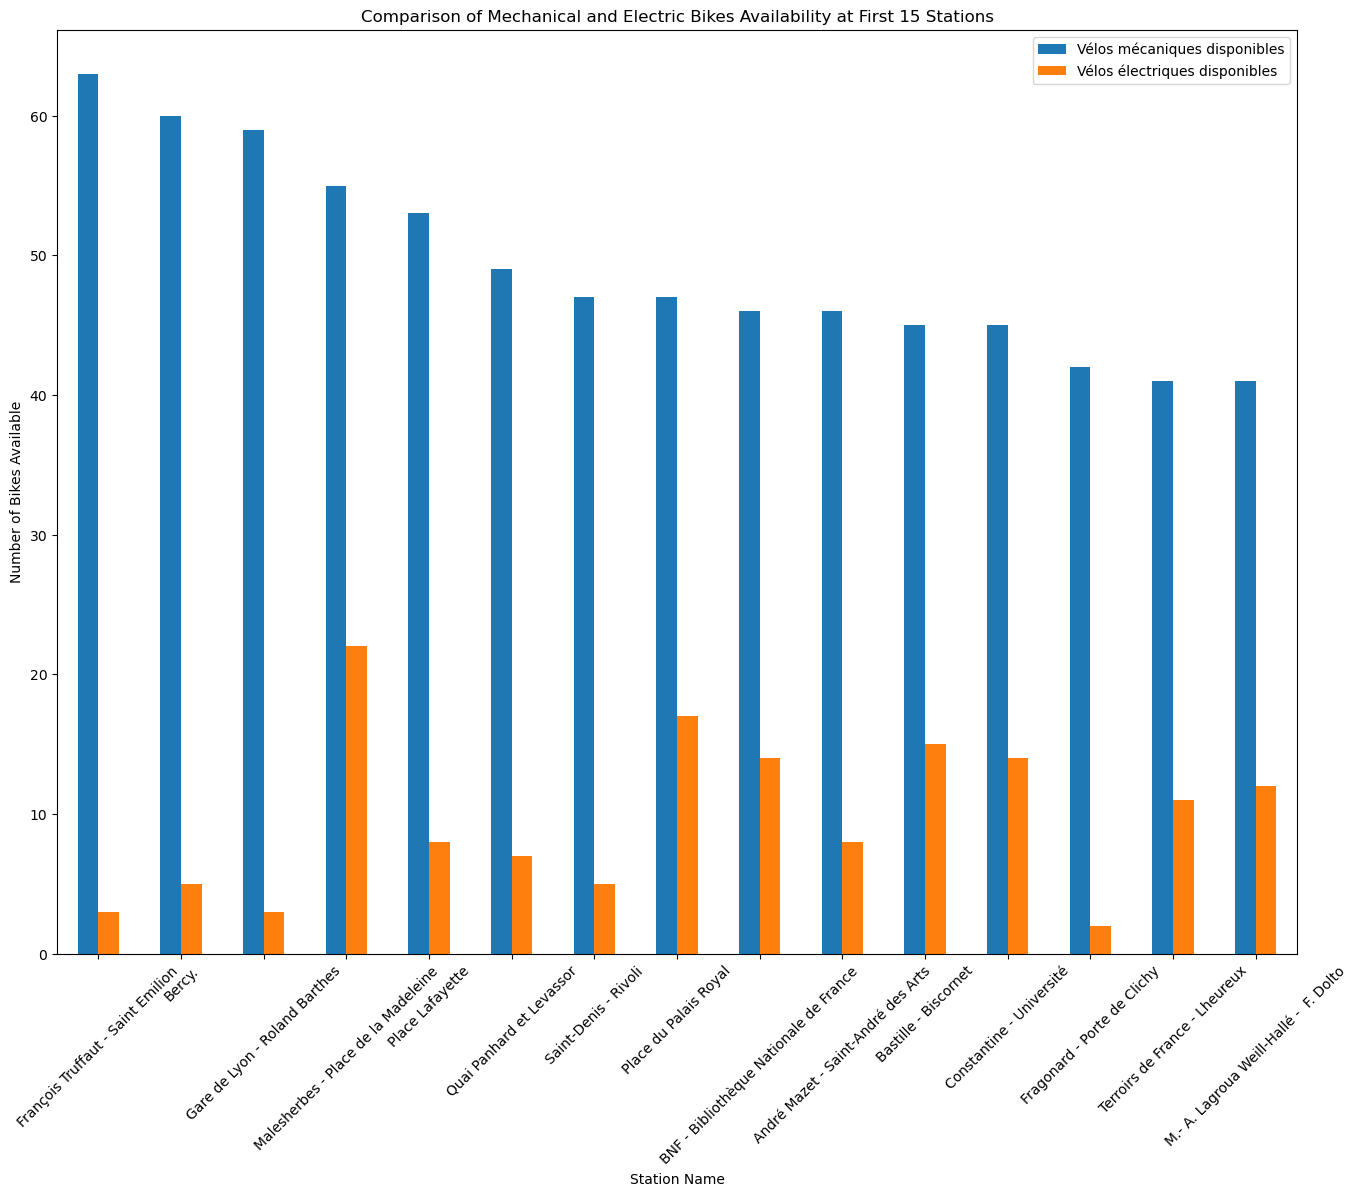

In [86]:
# Group data by station and sum up available bikes of each type for comparison
bike_availability = data.groupby('Nom station')[['Vélos mécaniques disponibles', 'Vélos électriques disponibles']].sum()

# Sort and select the first 20 stations for better visualization
bike_availability = bike_availability.sort_values(by='Vélos mécaniques disponibles', ascending=False).head(15)

# Create a bar plot comparing the availability
bike_availability.plot(kind='bar', figsize=(16, 12), title='Comparison of Mechanical and Electric Bikes Availability at First 15 Stations')
plt.ylabel('Number of Bikes Available')
plt.xlabel('Station Name')
plt.xticks(rotation=45)  # Rotate station names for better readability
plt.show()


### Analysis
The bar plot provides a visual illustration of the availability of the two bike types. By closely observing the plot, mechanical bikes show a notably higher availability across nearly all stations compared to electric bikes. This consistent pattern suggests various factors such as higher usage rates or longer recharge times might have made the availability of electric bikes significantly lower.



### conclusion

 The plot suggests the need to observe and revisit the supply strategy of electric bikes. If the goal is to promote the usage of electric bikes usage for environmental reasons, increasing their availability might be necessary. If however, the current distribution meets the users' needs and the operational objectives of the bike-sharing system, then the data supports the continuation of the current strategy.

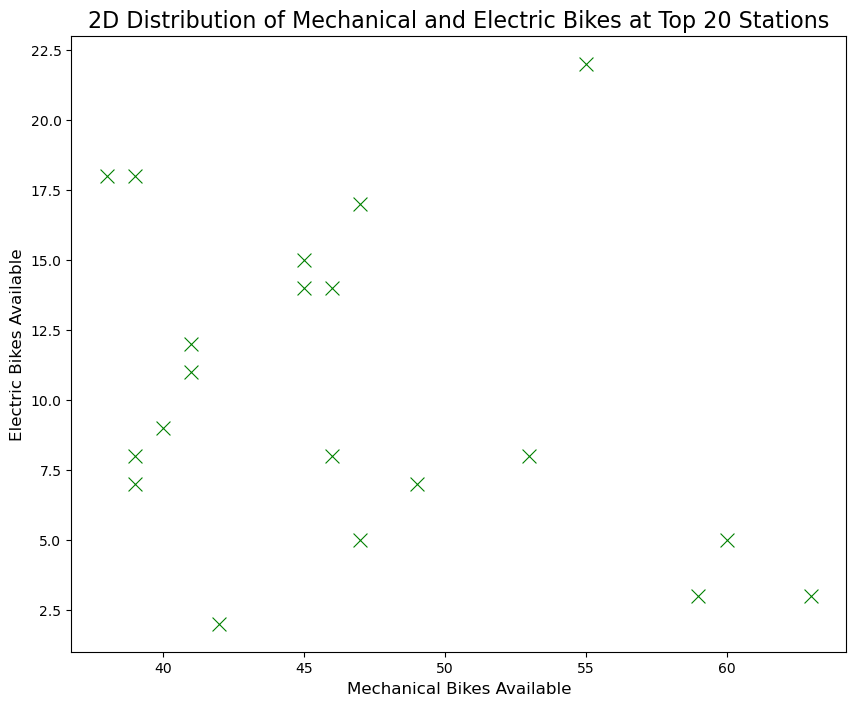

In [62]:
# Group data by station and sum up available bikes of each type for comparison
bike_availability = data.groupby('Nom station')[['Vélos mécaniques disponibles', 'Vélos électriques disponibles']].sum()

# Sort and select the first 20 stations for better visualization
bike_availability = bike_availability.sort_values(by='Vélos mécaniques disponibles', ascending=False).head(20)

# Creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Vélos mécaniques disponibles', y='Vélos électriques disponibles', data=bike_availability, color='green', s=100, marker='x')
plt.title('2D Distribution of Mechanical and Electric Bikes at Top 20 Stations', fontsize=16)
plt.xlabel('Mechanical Bikes Available', fontsize=12)
plt.ylabel('Electric Bikes Available', fontsize=12)
plt.show()

### Analysis of the graph:

The spread of points across the plot indicates a wide variation in the availability of mechanical bikes as opposed to electric bikes. The plot reveals that few stations have an outlier-like presence with a significant number of mechanical bikes available and fewer electric bikes. Mechanical bikes are available in larger numbers, ranging approximately from 35 to over 60 at different stations, suggesting a possibly stronger or more consistent demand for mechanical bikes, or it could simply be a reflection of the larger supply. There is no clear linear pattern showing a direct proportional relationship between the availability of mechanical and electric bikes. Instead, the availability varies independently, with some stations having a good balance of both types of bikes and others having a variance between them. This lack of a strong correlation could point to different user preferences or needs within different regions or station locations.  This maybe because these stations have specific user demands that have led to the imbalance. The data may also suggest the need for a strategic evaluation of bike type distribution, which could be due to various reasons like user preference, cost considerations, logistics of managing and charging electric bikes. If there is a plan to promote electric bike usage, in line with the environmental goals, the operators might need to consider increasing the availability of electric bikes as well as enhancing the charging infrastructure.


### Conclusion

In conclusion, The scatter plot is a visual tool that illustrates the current state of bike availability within the Vélib' network. It shows stations that might require a closer look to understand their unique supply and demand dynamics and implies that there could be an opportunity to optimize the distribution of bikes. It also gives a more in-depth analysis which reveals that possibly taking additional data on user behavior, will help to fully understand the factors influencing the current distribution and to forecast future needs

## Sub Question 1

 ### How does the availability of service amenities, such as return and payment terminals, vary across different areas?

In [63]:
# change 'OUI'/'NON' to boolean values
data['Borne de paiement disponible'] = data['Borne de paiement disponible'].map({'OUI': 1, 'NON': 0})
data['Retour vélib possible'] = data['Retour vélib possible'].map({'OUI': 1, 'NON': 0})

# Group by area and count the number of amenities
amenities_by_area = data.groupby('Nom communes équipées').agg({'Borne de paiement disponible': 'sum', 'Retour vélib possible': 'sum'}).reset_index()
print(amenities_by_area)

    Nom communes équipées  Borne de paiement disponible  Retour vélib possible
0             Alfortville                             5                      5
1                 Arcueil                             4                      4
2              Argenteuil                             5                      5
3      Asnières-sur-Seine                            12                     12
4           Aubervilliers                            13                     13
..                    ...                           ...                    ...
58          Ville-d'Avray                             1                      1
59              Villejuif                            11                     11
60  Villeneuve-la-Garenne                             2                      2
61              Vincennes                            10                     10
62        Vitry-sur-Seine                            15                     15

[63 rows x 3 columns]


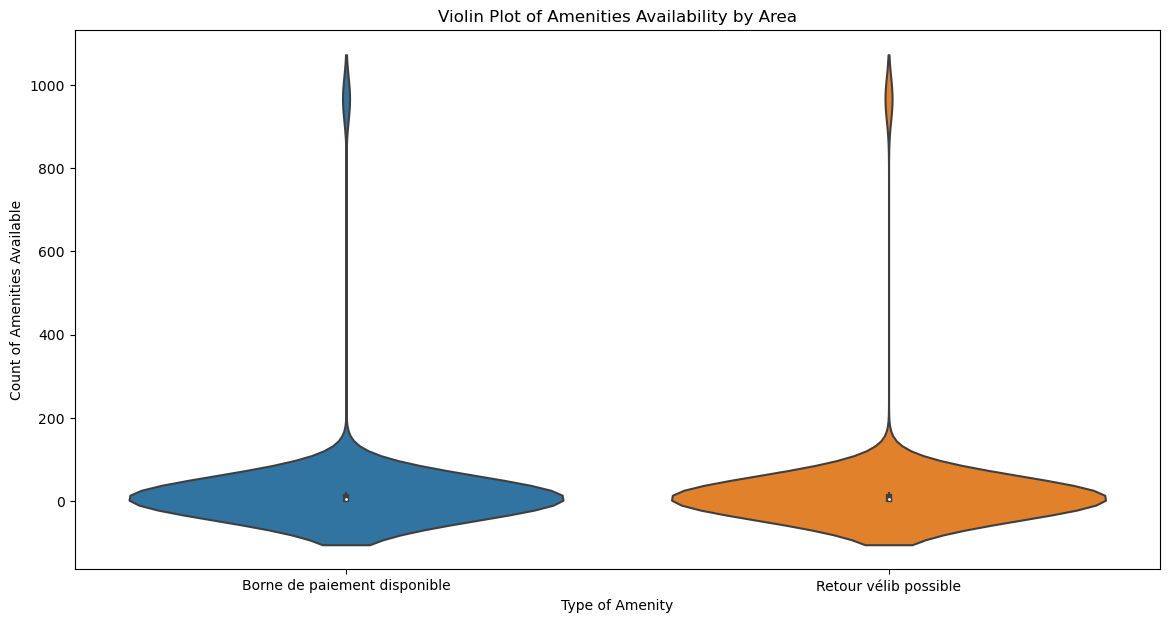

In [64]:
 
# Create a new DataFrame suitable for a seaborn box plot
melted_amenities = pd.melt(amenities_by_area, id_vars=['Nom communes équipées'], value_vars=['Borne de paiement disponible', 'Retour vélib possible'], var_name='Amenity', value_name='Count')

plt.figure(figsize=(14, 7))
sns.violinplot(x='Amenity', y='Count', data=melted_amenities)
plt.title('Violin Plot of Amenities Availability by Area')
plt.xlabel('Type of Amenity')
plt.ylabel('Count of Amenities Available')
plt.show()

### Analysis of the plot

The violin plot shows the distribution and density of the counts of each service amenity type across areas.
For both amenities ( payment terminals ('Borne de paiement disponible') and bike return options ('Retour vélib possible') – across various areas), the plot shows a wide base and a narrow peak, which suggests that while there are some areas with a very high count of these amenities, the majority have a much lower count.
The slim peak suggests that there are outliers with exceptionally high numbers, which could be due to areas with a high concentration of stations or maybe a central location where these amenities are particularly abundant.
The width of the violins at different points indicates the density of areas with those counts. A wider section of a violin means more areas have that count of amenities

### Conclusion from the plot


The broader base of the violins at the lower end of the count range suggests that there's a common baseline level of service provided across most areas.
The outliers point to a few areas that are exceptionally well-served, which might be hubs of transportation or areas with a high volume of users.This also may call for further investigation to have an understanding of why certain areas have such high availability and whether these amenities are being utilized effectively or if they could be redistributed.
The distribution suggests that while service amenities are generally available, there might be an uneven distribution with a concentration in certain areas.
Considering the shape of the violins, there is not a single typical value for the number of amenities; rather, there is variability across the areas.


## Sub Question 2

### Are there temporal trends in bike and terminal availability, and how do these trends relate to fluctuations in demand?

In [69]:
print(data.columns)

Index(['Identifiant station', 'Nom station', 'Station en fonctionnement',
       'Capacité de la station', 'Nombre bornettes libres',
       'Nombre total vélos disponibles', 'Vélos mécaniques disponibles',
       'Vélos électriques disponibles', 'Borne de paiement disponible',
       'Retour vélib possible', 'Actualisation de la donnée',
       'Coordonnées géographiques', 'Nom communes équipées',
       'Code INSEE communes équipées'],
      dtype='object')


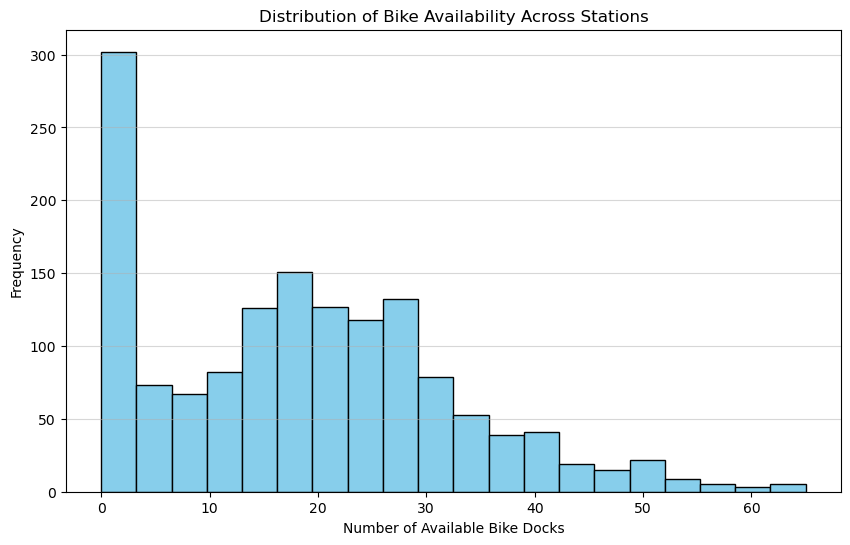

Summary Statistics of Bike Availability:
count    1468.000000
mean       18.385559
std        13.634927
min         0.000000
25%         6.000000
50%        18.000000
75%        27.000000
max        65.000000
Name: Nombre bornettes libres, dtype: float64


In [82]:


# Calculate summary statistics of bike availability
availability_stats = data['Nombre bornettes libres'].describe()

# Visualize the distribution of bike availability
plt.figure(figsize=(10, 6))
plt.hist(data['Nombre bornettes libres'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Bike Availability Across Stations')
plt.xlabel('Number of Available Bike Docks')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

print("Summary Statistics of Bike Availability:")
print(availability_stats)


### Analysis of the graph
